In [1]:
#thirdnote

In [2]:
!git clone https://github.com/Segunstar/ml-course-materials.git

Cloning into 'ml-course-materials'...
remote: Enumerating objects: 3119, done.
remote: Total 3119 (delta 0), reused 0 (delta 0), pack-reused 3119 (from 1)
Receiving objects: 100% (3119/3119), 52.52 MiB | 27.12 MiB/s, done.
Resolving deltas: 100% (501/501), done.


In [3]:
import os
os.getcwd()

'/content'

In [6]:
input_file = os.getcwd() + '/ml-course-materials/PastHires.csv'


In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
df = pd.read_csv(input_file, header=0)

In [8]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [9]:
def f(x):
  if x == 'Y':
    return 1
  else:
    return 0

def g(x):
  if x == 'BS':
    return 0
  elif x == 'MS':
    return 1
  else:
    return 2

In [12]:
df['Hired'] = df['Hired'].apply(f)
df['Employed?'] = df['Employed?'].apply(f)
df['Interned'] = df['Interned'].apply(f)
df['Top-tier school'] = df['Top-tier school'].apply(f)
df['Level of Education'] = df['Level of Education'].apply(g)

In [13]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [14]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [15]:
y = df['Hired']
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

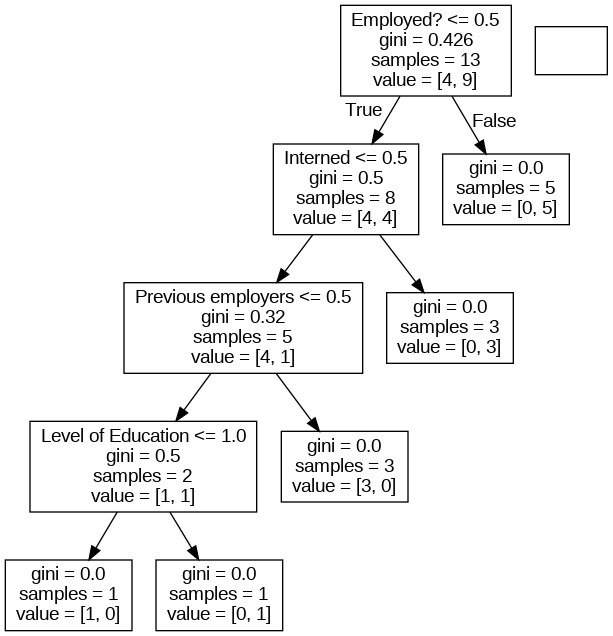

In [17]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
print(clf.predict([[10,1,4,0,0,0]]))
print(clf.predict([[10,0,4,0,0,0]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
